In [2]:
from PIL import Image

In [1]:
def hsv_to_rgb(h, s, v):
       if s == 0.0: v*=255; return (v, v, v)
       i = int(h*6.)
       f = (h*6.)-i; p,q,t = int(255*(v*(1.-s))), int(255*(v*(1.-s*f))), int(255*(v*(1.-s*(1.-f)))); v*=255; i%=6
       if i == 0: return (v, t, p)
       if i == 1: return (q, v, p)
       if i == 2: return (p, v, t)
       if i == 3: return (p, q, v)
       if i == 4: return (t, p, v)
       if i == 5: return (v, p, q)

In [3]:
hsv_to_rgb(300,0,1)

(255, 255, 255)

In [4]:
hsv_to_rgb(270,1,1)

(255, 0, 0)

In [3]:
import numpy as np

In [6]:
def color_map(h):
    arr=np.zeros((255,255),dtype=np.uint8)
    


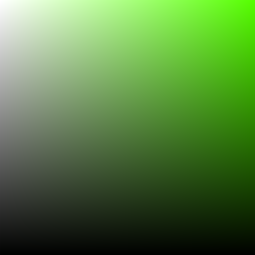

In [7]:
arr=np.zeros((255,255,3),dtype=np.uint8)
h=100
for i in range(arr.shape[0]):
    v=255-i
    for j in range(arr.shape[1]):
        arr[i][j]=hsv_to_rgb(h/360,j/255,v/255)
        
Image.fromarray(arr) 

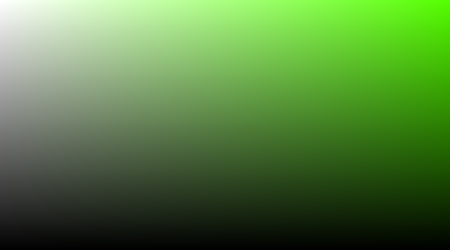

In [8]:
img=Image.fromarray(arr) 
img.resize((450,250))

In [9]:
 arr2=np.zeros((30,360,3),dtype=np.uint8)
for i in range(arr2.shape[1]):
    for j in range(arr2.shape[0]):
        arr2[j][i]=hsv_to_rgb(i/360,1,1)
        
h_scale_img=Image.fromarray(arr2)
h_scale_img

In [10]:
h_scale_img.save("h_scale.png")

In [11]:
 arr3=np.zeros((30,360,3),dtype=np.uint8)
for i in range(arr3.shape[1]):
    for j in range(arr3.shape[0]):
        arr3[j][i]=hsv_to_rgb(0,0,i/arr3.shape[1])
        
alpha_scale_img=Image.fromarray(arr3)
alpha_scale_img.save("alpha_scale.jpg")
alpha_scale_img

In [15]:
vertical_h_scale=h_scale_img.transpose(Image.Transpose.TRANSVERSE)
vertical_h_scale.save("vertical_h_scale.png")
vertical_h_scale

In [16]:
vertical_alpha_scale=alpha_scale_img.transpose(Image.Transpose.TRANSVERSE)
vertical_alpha_scale.save("vertical_alpha_scale.png")
vertical_alpha_scale

In [32]:
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return round(h), round(s), round(v)

In [9]:
hsv_to_rgb(179,1,1)

(255, 0, 0)

In [10]:
import requests
from bs4 import BeautifulSoup
import json

In [11]:

page = requests.get("https://htmlcolorcodes.com/color-names/")
soup = BeautifulSoup(page.text, 'html.parser')

In [33]:
color_group=dict()
for table in soup.find_all('table'):
    d=dict()
    for row in table.find_all("tr")[1:]:
        cols=row.find_all("td")
        rd=dict()
        rd["hex"]=cols[2].text
        rd["rgb"]=eval(cols[3].text[3:])
        rd['hsv']=rgb_to_hsv(*rd["rgb"])
        d[cols[1].text]=rd
    color_group[table.find_previous('h2').text.split(" ")[0]]=d
    

color_group

{'Red': {'IndianRed': {'hex': '#CD5C5C',
   'rgb': (205, 92, 92),
   'hsv': (0, 55, 80)},
  'LightCoral': {'hex': '#F08080', 'rgb': (240, 128, 128), 'hsv': (0, 47, 94)},
  'Salmon': {'hex': '#FA8072', 'rgb': (250, 128, 114), 'hsv': (6, 54, 98)},
  'DarkSalmon': {'hex': '#E9967A',
   'rgb': (233, 150, 122),
   'hsv': (15, 48, 91)},
  'LightSalmon': {'hex': '#FFA07A',
   'rgb': (255, 160, 122),
   'hsv': (17, 52, 100)},
  'Crimson': {'hex': '#DC143C', 'rgb': (220, 20, 60), 'hsv': (348, 91, 86)},
  'Red': {'hex': '#FF0000', 'rgb': (255, 0, 0), 'hsv': (0, 100, 100)},
  'FireBrick': {'hex': '#B22222', 'rgb': (178, 34, 34), 'hsv': (0, 81, 70)},
  'DarkRed': {'hex': '#8B0000', 'rgb': (139, 0, 0), 'hsv': (0, 100, 55)}},
 'Pink': {'Pink': {'hex': '#FFC0CB',
   'rgb': (255, 192, 203),
   'hsv': (350, 25, 100)},
  'LightPink': {'hex': '#FFB6C1',
   'rgb': (255, 182, 193),
   'hsv': (351, 29, 100)},
  'HotPink': {'hex': '#FF69B4', 'rgb': (255, 105, 180), 'hsv': (330, 59, 100)},
  'DeepPink': {'hex

In [34]:
print(json.dumps(color_group,indent=4))

{
    "Red": {
        "IndianRed": {
            "hex": "#CD5C5C",
            "rgb": [
                205,
                92,
                92
            ],
            "hsv": [
                0,
                55,
                80
            ]
        },
        "LightCoral": {
            "hex": "#F08080",
            "rgb": [
                240,
                128,
                128
            ],
            "hsv": [
                0,
                47,
                94
            ]
        },
        "Salmon": {
            "hex": "#FA8072",
            "rgb": [
                250,
                128,
                114
            ],
            "hsv": [
                6,
                54,
                98
            ]
        },
        "DarkSalmon": {
            "hex": "#E9967A",
            "rgb": [
                233,
                150,
                122
            ],
            "hsv": [
                15,
                48,
           

In [37]:
with open("color_data.json","w") as f:
    json.dump(color_group,f,indent=4)

In [2]:
import os

# path of the given file
print(os.path.dirname(os.path.abspath("flower.jpg")))

# current working directory
print(os.path.abspath(os.getcwd()))
os.path.abspath("flower.jpg")

D:\Users\Dell\Documents\PythonProjects\DS projects\pillow
D:\Users\Dell\Documents\PythonProjects\DS projects\pillow


'D:\\Users\\Dell\\Documents\\PythonProjects\\DS projects\\pillow\\flower.jpg'